In [ ]:
import gwaslab as gl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%matplotlib inline
%cd /home/abdu/bio_ai/code/biocypher-metta

In [ ]:
gl.check_available_ref()

### 1. Load sumstats data

In [2]:
sumstats = gl.Sumstats('./notebooks/1kgeas.B1.glm.firth', fmt='plink2')

Fri Apr 19 04:34:41 2024 GWASLab v3.4.24 https://cloufield.github.io/gwaslab/
Fri Apr 19 04:34:41 2024 (C) 2022-2023, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
Fri Apr 19 04:34:41 2024 Start to load format from formatbook....
Fri Apr 19 04:34:41 2024  -plink2 format meta info:
Fri Apr 19 04:34:41 2024   - format_name  : PLINK2 .glm.firth, .glm.logistic,.glm.linear
Fri Apr 19 04:34:41 2024   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
Fri Apr 19 04:34:41 2024   - format_version  : Alpha 3.3 final (3 Jun)
Fri Apr 19 04:34:41 2024   - last_check_date  :  20220806
Fri Apr 19 04:34:41 2024  -plink2 to gwaslab format dictionary:
Fri Apr 19 04:34:41 2024   - plink2 keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,T_STAT,Z_STAT,P,LOG10_P,MACH_R2,OR
Fri Apr 19 04:34:41 2024   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,T,Z,P,MLOG10P,INFO,OR
Fri Apr 19 04:34:41 2024 Start to initiate from file :./notebooks/1kgeas.B1.glm.firth
Fri

In [22]:
# sumstats.basic_check()
sumstats.basic_check(sanitycheckstats_args={"OR":(-10,10)})

Fri Apr 19 04:48:59 2024 Start to check IDs...
Fri Apr 19 04:48:59 2024  -Current Dataframe shape : 1128732  x  14
Fri Apr 19 04:48:59 2024  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Apr 19 04:49:01 2024 Finished checking IDs successfully!
Fri Apr 19 04:49:01 2024 Start to fix chromosome notation...
Fri Apr 19 04:49:01 2024  -Current Dataframe shape : 1128732  x  14
Fri Apr 19 04:49:01 2024  -Checking CHR data type...
Fri Apr 19 04:49:01 2024  -Variants with standardized chromosome notation: 1128732
Fri Apr 19 04:49:02 2024  -All CHR are already fixed...
Fri Apr 19 04:49:03 2024  -Sanity check for CHR...
Fri Apr 19 04:49:03 2024  -Removed 0 varaints with CHR < 1...
Fri Apr 19 04:49:03 2024 Finished fixing chromosome notation successfully!
Fri Apr 19 04:49:03 2024 Start to fix basepair positions...
Fri Apr 19 04:49:03 2024  -Current Dataframe shape : 1128732  x  14
Fri Apr 19 04:49:03 2024  -Converting to Int64 data type ...
Fri Apr 19 04:49:04 2024  -Position up

In [23]:
sumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,SE,Z,P,OR,N,STATUS,REF,ALT
0,1:77874:G:A,1,77874,A,G,0.019153,0.462750,0.249299,0.803130,1.122280,496,9960099,G,A
1,1:125271:C:T,1,125271,C,T,0.029234,0.373358,1.145800,0.251880,1.533870,496,9960099,C,T
2,1:232449:G:A,1,232449,A,G,0.185484,0.168961,-0.729096,0.465943,0.884097,496,9960099,G,A
3,1:533113:A:G,1,533113,G,A,0.129555,0.196631,-0.502430,0.615365,0.905930,494,9960099,A,G
4,1:565697:A:G,1,565697,G,A,0.334677,0.152860,0.297509,0.766078,1.046530,496,9960099,A,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907934,22:51213826:G:A,22,51213826,A,G,0.039394,0.334408,-0.563075,0.573384,0.828369,495,9960099,G,A
907935,22:51215028:C:G,22,51215028,G,C,0.039634,0.323455,0.637389,0.523871,1.228960,492,9960099,C,G
907936,22:51216127:T:C,22,51216127,C,T,0.354545,0.132846,-0.844257,0.398526,0.893904,495,9960099,T,C
907937,22:51218377:G:C,22,51218377,C,G,0.033333,0.362212,-0.994457,0.320000,0.697534,495,9960099,G,C


In [24]:
sumstats.get_lead(sig_level=5e-8)

Fri Apr 19 04:49:15 2024 Start to extract lead variants...
Fri Apr 19 04:49:15 2024  -Processing 907939 variants...
Fri Apr 19 04:49:15 2024  -Significance threshold : 5e-08
Fri Apr 19 04:49:15 2024  -Sliding window size: 500  kb
Fri Apr 19 04:49:15 2024  -Found 43 significant variants in total...
Fri Apr 19 04:49:15 2024  -Identified 4 lead variants!
Fri Apr 19 04:49:15 2024 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,EAF,SE,Z,P,OR,N,STATUS,REF,ALT
44298,1:167562605:G:A,1,167562605,A,G,0.391481,0.159645,7.69462,1.419150e-14,3.415780,493,9960099,G,A
91266,2:55513738:C:T,2,55513738,C,T,0.376008,0.153159,-7.96244,1.686760e-15,0.295373,496,9960099,C,T
442239,7:134368632:T:G,7,134368632,G,T,0.138105,0.225526,6.89025,5.569440e-12,4.730010,496,9960099,T,G
875859,20:42758834:T:C,20,42758834,T,C,0.227273,0.184323,-7.76902,7.909780e-15,0.238829,495,9960099,T,C


### 2. Create mahattan plot

Fri Apr 19 04:49:19 2024 Start to plot manhattan/qq plot with the following basic settings:
Fri Apr 19 04:49:19 2024  -Genomic coordinates version: 99...
Fri Apr 19 04:49:19 2024    -WARNING!!! Genomic coordinates version is unknown...
Fri Apr 19 04:49:19 2024  -Genome-wide significance level is set to 5e-08 ...
Fri Apr 19 04:49:19 2024  -Raw input contains 907939 variants...
Fri Apr 19 04:49:19 2024  -Plot layout mode is : mqq
Fri Apr 19 04:49:19 2024 Finished loading specified columns from the sumstats.
Fri Apr 19 04:49:19 2024 Start conversion and sanity check:
Fri Apr 19 04:49:19 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Apr 19 04:49:19 2024  -Removed 0 varaints with CHR <=0...
Fri Apr 19 04:49:19 2024  -Removed 0 variants with nan in P column ...
Fri Apr 19 04:49:20 2024  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Apr 19 04:49:20 2024  -Sumstats P values are being converted to -log10(P)...
Fri Apr 19 04:49:

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7f5ad46249a0>)

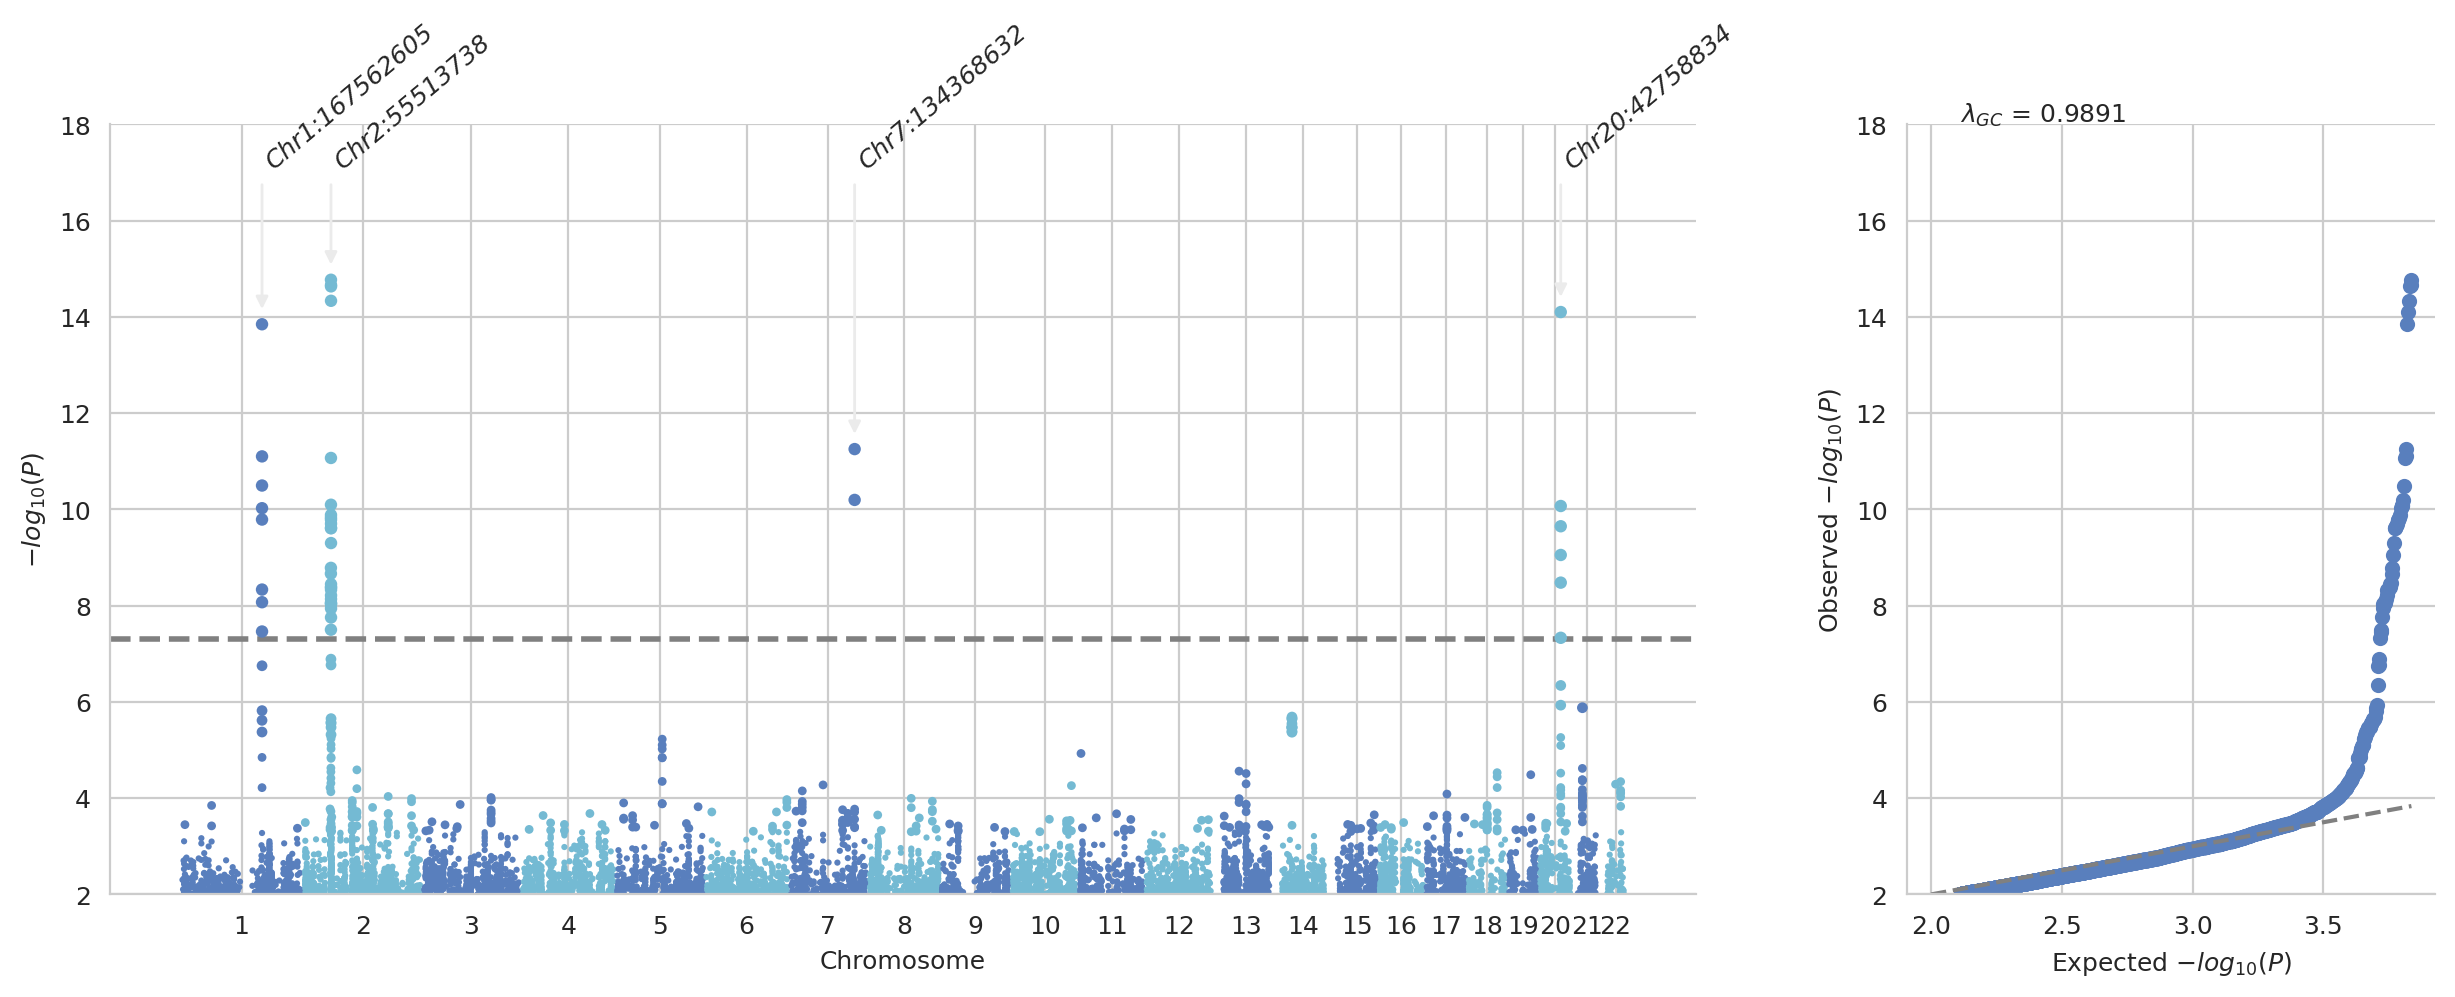

In [25]:
sumstats.plot_mqq(skip=2,anno=True)

Fri Apr 19 02:34:49 2024 Start to plot manhattan/qq plot with the following basic settings:
Fri Apr 19 02:34:49 2024  -Genomic coordinates version: hg19...
Fri Apr 19 02:34:49 2024  -Genome-wide significance level is set to 5e-08 ...
Fri Apr 19 02:34:49 2024  -Raw input contains 456407 variants...
Fri Apr 19 02:34:49 2024  -Plot layout mode is : r
Fri Apr 19 02:34:49 2024  -Region to plot : chr2:54513738-56513738.
Fri Apr 19 02:34:49 2024  -Extract SNPs in region : chr2:54513738-56513738...
Fri Apr 19 02:34:49 2024  -Extract SNPs in specified regions: 339
Fri Apr 19 02:34:49 2024 Finished loading specified columns from the sumstats.
Fri Apr 19 02:34:49 2024 Start conversion and sanity check:
Fri Apr 19 02:34:49 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Apr 19 02:34:49 2024  -Removed 0 varaints with CHR <=0...
Fri Apr 19 02:34:49 2024  -Removed 0 variants with nan in P column ...
Fri Apr 19 02:34:49 2024  -Sanity check after conversion: 0 variants with P value outs

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.Log.Log at 0x7efefc350640>)

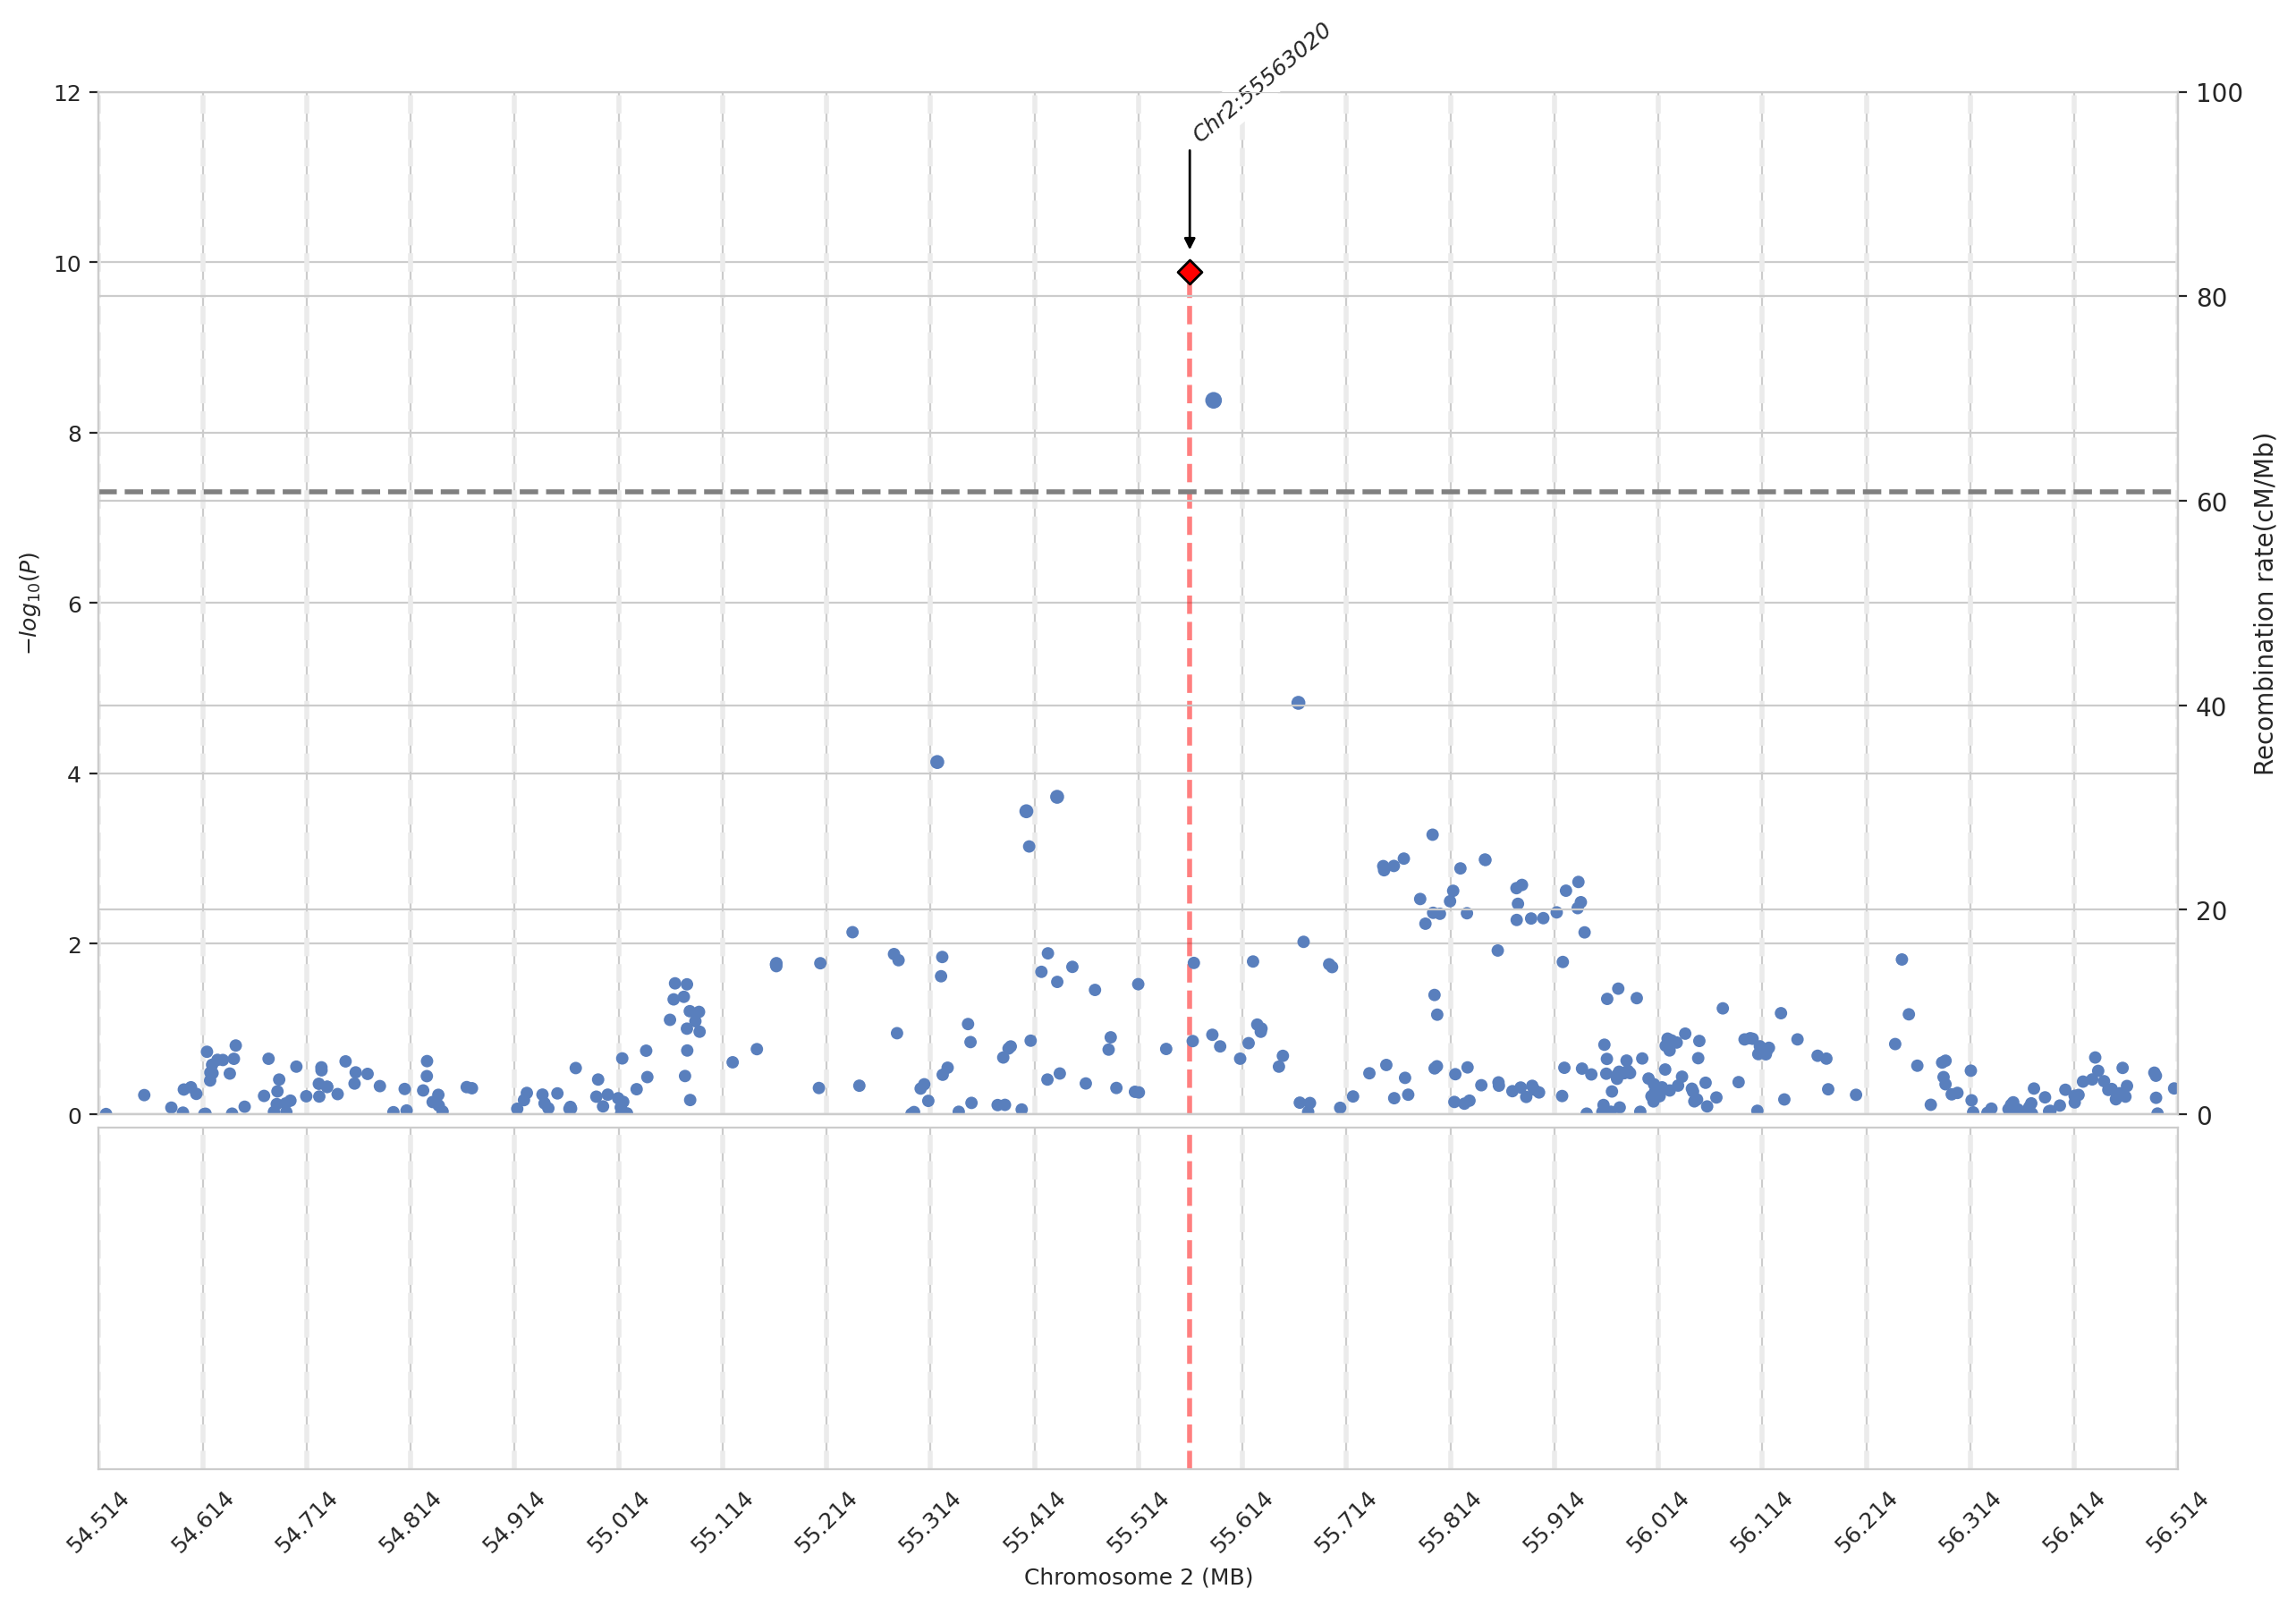

In [10]:
sumstats.plot_mqq(mode="r", anno=True, region=(2,54513738,56513738), region_grid=True, build='hg19')

In [15]:
gl.download_ref("1kg_eas_hg19")

Tue Apr 16 06:51:11 2024 Start to download  1kg_eas_hg19  ...
Tue Apr 16 06:51:11 2024  -Downloading to: /home/abdu/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
Tue Apr 16 06:52:11 2024  -File path: /home/abdu/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
Tue Apr 16 06:52:11 2024  -MD5 check: c8c97434843c0da3113fc06879ead472
Tue Apr 16 06:52:11 2024  -MD5 verified.
Tue Apr 16 06:52:11 2024  -Updating record in config file...
Tue Apr 16 06:52:13 2024  -Updating record in config file...
Tue Apr 16 06:52:13 2024  -Downloading to: /home/abdu/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi
Tue Apr 16 06:52:13 2024 Downloaded  1kg_eas_hg19  successfully!


Tue Apr 16 06:52:13 2024 Start to plot manhattan/qq plot with the following basic settings:
Tue Apr 16 06:52:13 2024  -Genomic coordinates version: 19...
Tue Apr 16 06:52:13 2024  -Genome-wide significance level is set to 5e-08 ...
Tue Apr 16 06:52:13 2024  -Raw input contains 456407 variants...
Tue Apr 16 06:52:13 2024  -Plot layout mode is : r
Tue Apr 16 06:52:13 2024  -Region to plot : chr2:54531536-56731536.
Tue Apr 16 06:52:13 2024  -Checking prefix for chromosomes in vcf files...
Tue Apr 16 06:52:13 2024  -No prefix for chromosomes in the VCF files.
Tue Apr 16 06:52:13 2024  -Extract SNPs in region : chr2:54531536-56731536...
Tue Apr 16 06:52:13 2024  -Extract SNPs in specified regions: 403
Tue Apr 16 06:52:13 2024 Finished loading specified columns from the sumstats.
Tue Apr 16 06:52:13 2024 Start conversion and sanity check:
Tue Apr 16 06:52:13 2024  -Removed 0 variants with nan in CHR or POS column ...
Tue Apr 16 06:52:13 2024  -Removed 0 varaints with CHR <=0...
Tue Apr 16 06

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


Tue Apr 16 07:05:25 2024  -plotting gene track..
Tue Apr 16 07:05:25 2024  -Finished plotting gene track..
Tue Apr 16 07:05:26 2024  -Found 1 significant variants with a sliding window size of 500 kb...
Tue Apr 16 07:05:26 2024 Finished creating Manhattan plot successfully!
Tue Apr 16 07:05:26 2024  -Annotating using column CHR:POS...
Tue Apr 16 07:05:26 2024  -Adjusting text positions with repel_force=0.03...
Tue Apr 16 07:05:26 2024  -Skip saving figures!


(<Figure size 3000x2000 with 4 Axes>, <gwaslab.Log.Log at 0x7f3ad8400040>)

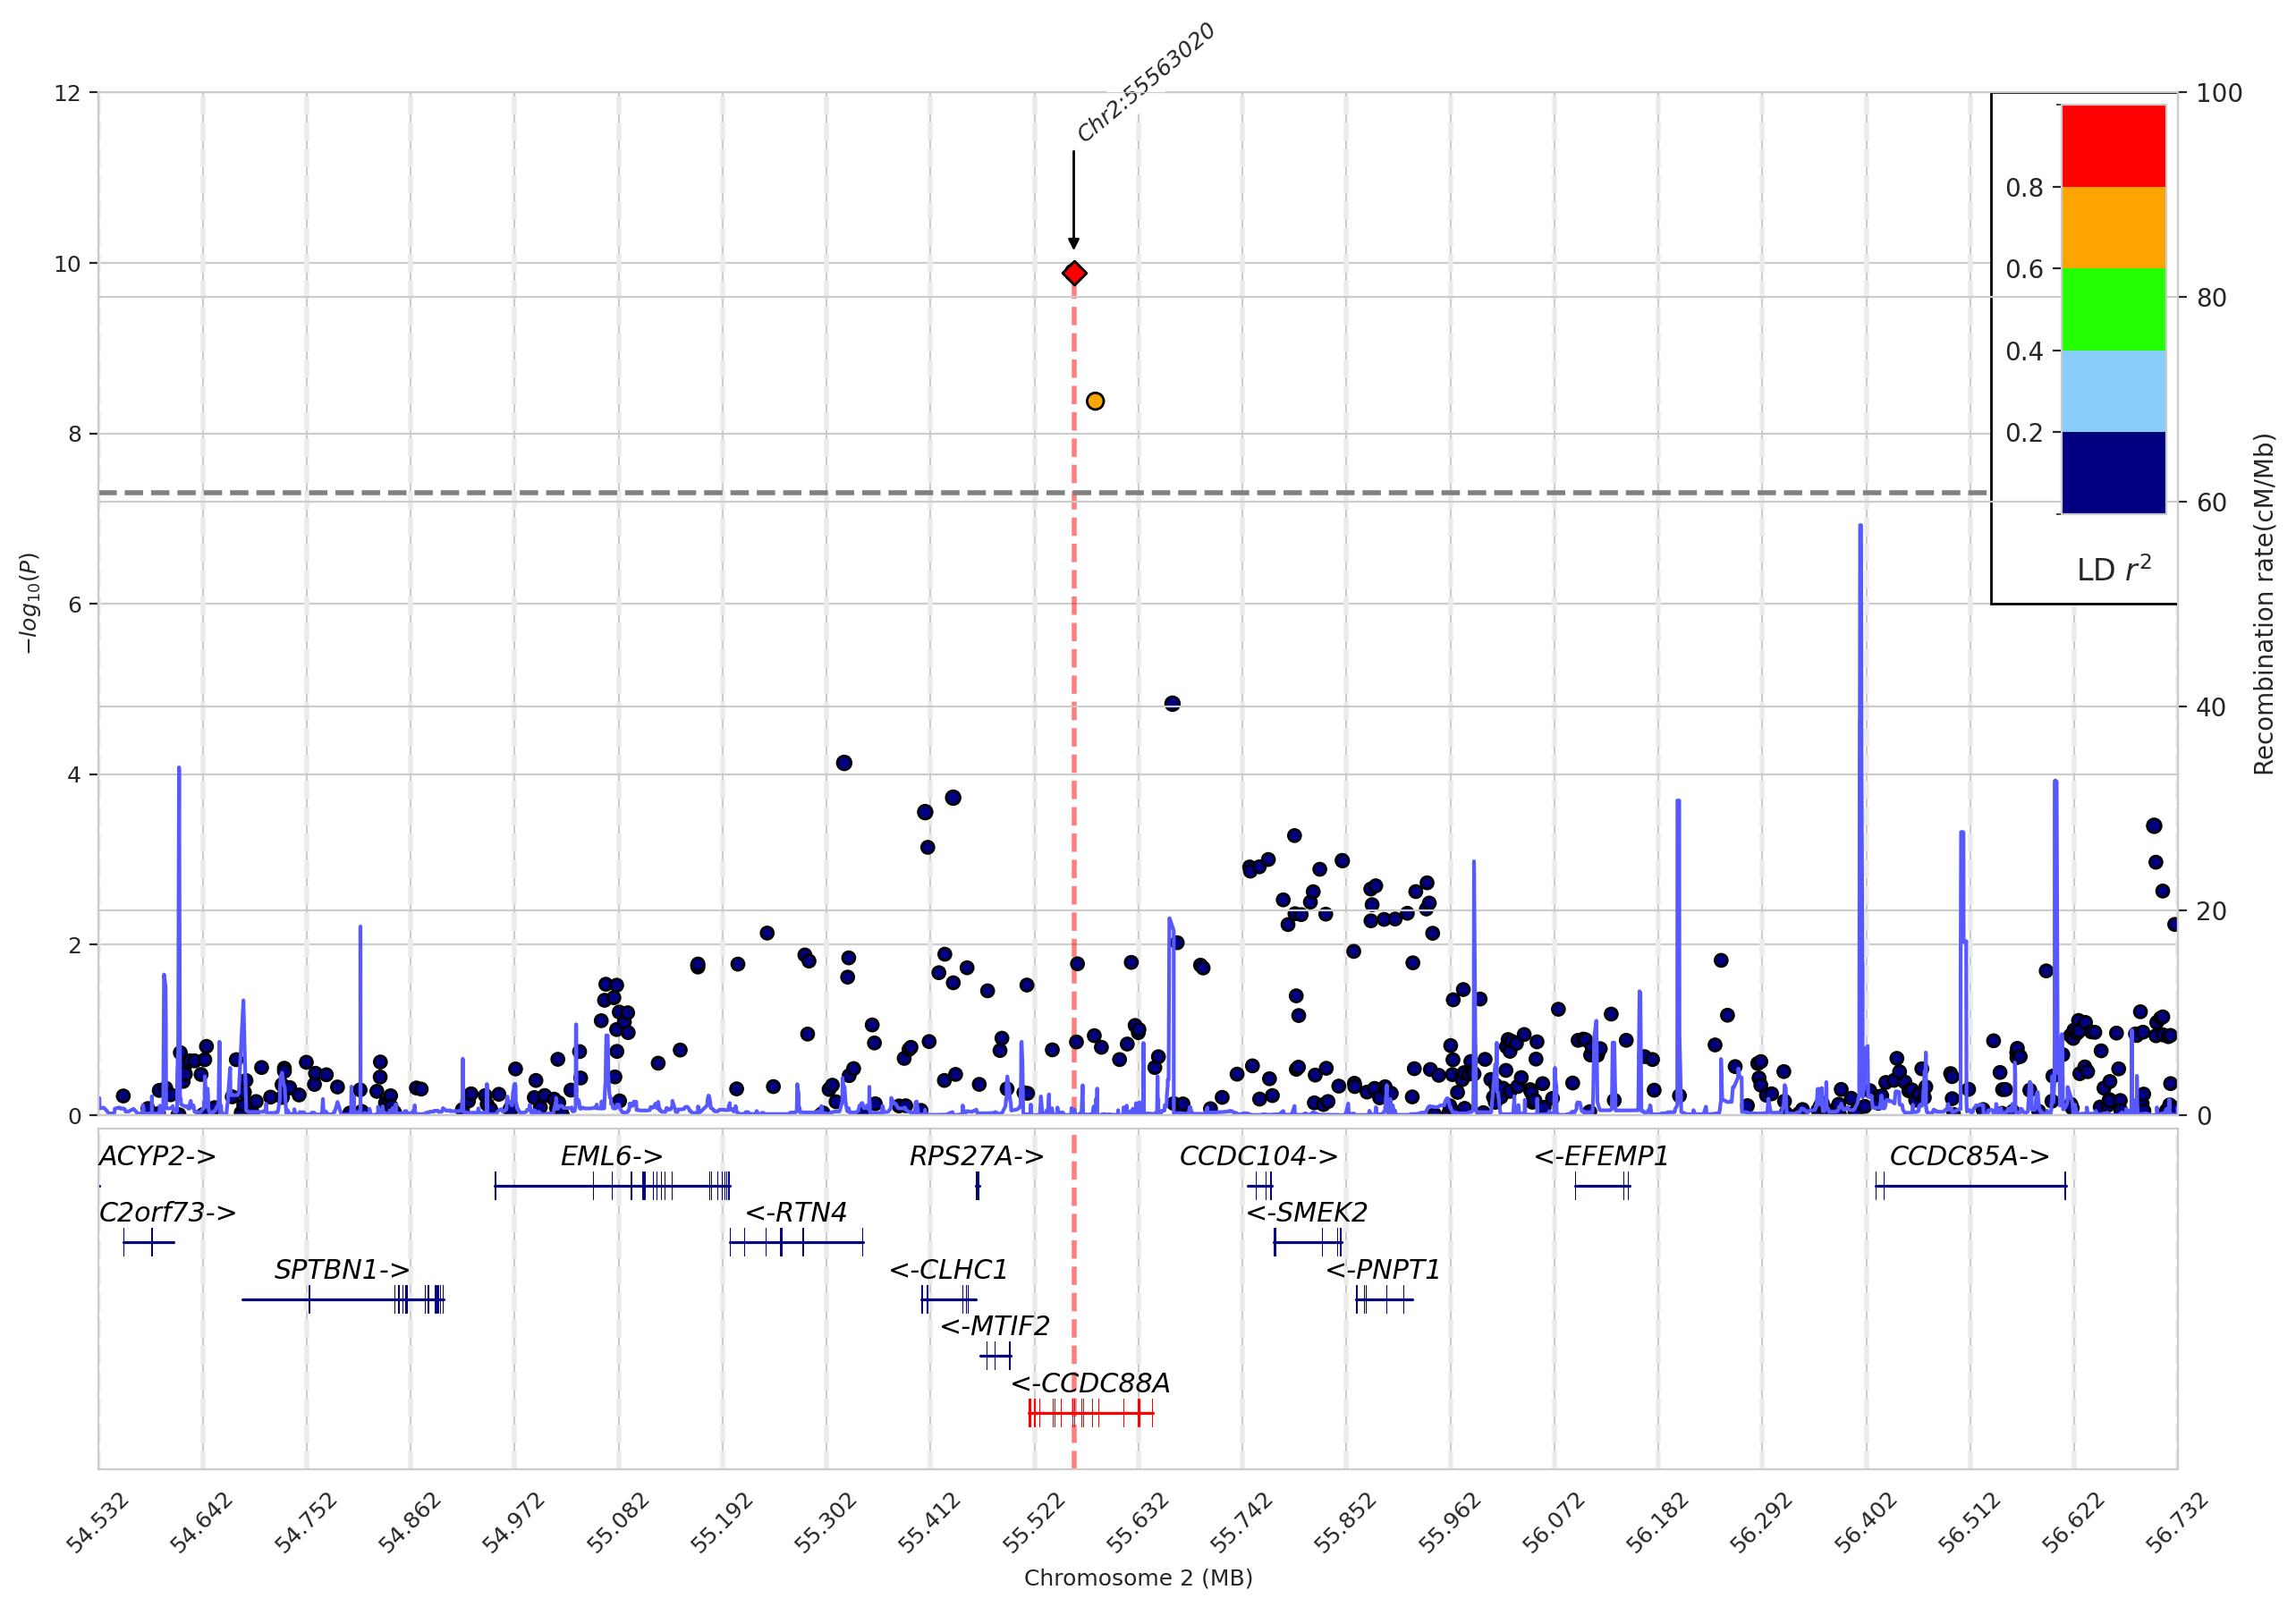

In [16]:
sumstats.plot_mqq(mode="r",anno=True,region=(2,54531536,56731536),region_grid=True,vcf_path=gl.get_path("1kg_eas_hg19"),build="19")

In [26]:
locus = sumstats.filter_value('CHR==2 & POS>55074452 & POS<56074452')
print(locus.data.shape)
locus.data

Fri Apr 19 04:49:29 2024 Start filtering values by condition: CHR==2 & POS>55074452 & POS<56074452
Fri Apr 19 04:49:29 2024  -Removing 907546 variants not meeting the conditions: CHR==2 & POS>55074452 & POS<56074452
Fri Apr 19 04:49:29 2024 Finished filtering values.
(393, 14)


,SNPID,CHR,POS,EA,NEA,EAF,SE,Z,P,OR,N,STATUS,REF,ALT
91085,2:55074978:G:A,2,55074978,G,A,0.050505,0.305248,-1.746900,0.080655,0.586703,495,9960099,G,A
91086,2:55076441:T:C,2,55076441,C,T,0.337702,0.133054,2.034920,0.041859,1.310950,496,9960099,T,C
91087,2:55077573:C:G,2,55077573,G,C,0.252525,0.145470,0.923250,0.355877,1.143740,495,9960099,C,G
91088,2:55078875:T:G,2,55078875,G,T,0.051411,0.303644,-1.911530,0.055936,0.559660,496,9960099,T,G
91089,2:55079388:C:T,2,55079388,T,C,0.332323,0.133361,1.649980,0.098947,1.246130,495,9960099,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91473,2:56059103:C:T,2,56059103,C,T,0.192073,0.167707,0.794589,0.426852,1.142550,492,9960099,C,T
91474,2:56060313:A:G,2,56060313,G,A,0.045363,0.315762,-1.219660,0.222595,0.680368,496,9960099,A,G
91475,2:56060585:A:T,2,56060585,T,A,0.020161,0.462563,0.241559,0.809122,1.118220,496,9960099,A,T
91476,2:56069486:C:T,2,56069486,T,C,0.021298,0.452979,0.473718,0.635701,1.239350,493,9960099,C,T


In [27]:
locus.fill_data(to_fill=["BETA"])

Fri Apr 19 04:49:32 2024 Start filling data using existing columns...
Fri Apr 19 04:49:32 2024  -Raw input columns:  ['SNPID', 'CHR', 'POS', 'EA', 'NEA', 'EAF', 'SE', 'Z', 'P', 'OR', 'N', 'STATUS', 'REF', 'ALT']
Fri Apr 19 04:49:32 2024  -Overwrite mode:  False
Fri Apr 19 04:49:32 2024   -Skipping columns:  []
Fri Apr 19 04:49:32 2024  -Filling columns:  ['BETA']
Fri Apr 19 04:49:32 2024   - Filling Columns iteratively...
Fri Apr 19 04:49:32 2024   - Filling BETA value using OR column...
Fri Apr 19 04:49:32 2024 Start to reorder the columns...
Fri Apr 19 04:49:32 2024  -Current Dataframe shape : 393  x  15
Fri Apr 19 04:49:32 2024  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT
Fri Apr 19 04:49:32 2024 Finished sorting columns successfully!
Fri Apr 19 04:49:32 2024 Finished filling data using existing columns.


In [9]:
# gl.download_ref("1kg_dbsnp151_hg19_auto") #1kg dbsnp hg19 reference
# gl.download_ref("dbsnp_v156_hg19") #dbSNP hg19 reference
# gl.download_ref("ucsc_genome_hg19") #USCS genome hg19 reference

In [29]:
locus.harmonize(n_cores=8,  
                basic_check=False,
                ref_seq=gl.get_path("ucsc_genome_hg19"), 
                ref_rsid_tsv=gl.get_path("1kg_dbsnp151_hg19_auto"),
                ref_rsid_vcf=gl.get_path("dbsnp_v156_hg19"))

Fri Apr 19 04:49:42 2024 Start to check if NEA is aligned with reference sequence...
Fri Apr 19 04:49:42 2024  -Current Dataframe shape : 393  x  15
Fri Apr 19 04:49:42 2024  -Reference genome fasta file: /home/abdu/.gwaslab/hg19.fa
Fri Apr 19 04:49:42 2024  -Checking records: 1  2  3  4  5  6  7  X  8  9  10  11  12  13  14  15  16  17  18  20  Y  19  22  21  M  
Fri Apr 19 04:49:59 2024  -Variants allele on given reference sequence :  268
Fri Apr 19 04:49:59 2024  -Variants flipped :  125
Fri Apr 19 04:49:59 2024   -Raw Matching rate :  100.00%
Fri Apr 19 04:49:59 2024  -Variants inferred reverse_complement :  0
Fri Apr 19 04:49:59 2024  -Variants inferred reverse_complement_flipped :  0
Fri Apr 19 04:49:59 2024  -Both allele on genome + unable to distinguish :  0
Fri Apr 19 04:49:59 2024  -Variants not on given reference sequence :  0
Fri Apr 19 04:49:59 2024  -Current Dataframe shape : 393  x  15
Fri Apr 19 04:49:59 2024 Start to flip allele-specific stats for SNPs with status xxxx

In [31]:
df = locus.data.copy()
locus.data["SNPID"].to_csv("./notebooks/sig_locus.snplist",sep="\t",index=None,header=None)

### Run PLINK to get LD matrix for this locus

In [32]:
!plink \
  --bfile "./notebooks/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r square \
  --extract ./notebooks/sig_locus.snplist \
  --out ./notebooks/sig_locus_mt

!plink \
  --bfile "./notebooks/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r2 square \
  --extract ./notebooks/sig_locus.snplist \
  --out ./notebooks/sig_locus_mt_r2

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./notebooks/sig_locus_mt.log.
Options in effect:
  --bfile ./notebooks/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract ./notebooks/sig_locus.snplist
  --keep-allele-order
  --out ./notebooks/sig_locus_mt
  --r square

257435 MB RAM detected; reserving 128717 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./notebooks/sig_locus_mt.nosex .
--extract: 393 variants remaining.
Using up to 27 threads (change this with --threads).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.992488.
393 variants and 504 people pass filters and QC.
Note: No phenotypes present.
--r square to ./notebooks/sig_locus_mt.ld ... do

In [33]:
%autoreload
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri as numpy2ri
import rpy2.robjects.pandas2ri as pandas2ri
numpy2ri.activate()
pandas2ri.activate()

In [34]:
# import rpy2.robjects.packages as rpackages
# utils = rpackages.importr('utils')
# utils.chooseCRANmirror(ind=1)
# utils.install_packages('susieR')

In [35]:
#import susieR 
susieR = importr('susieR')

In [36]:
#Load LD data
ld = pd.read_csv("./notebooks/sig_locus_mt.ld", sep="\t", header=None)
R_df = ld.values
ld2 = pd.read_csv("././notebooks/sig_locus_mt_r2.ld",sep="\t",header=None)
R_df2 = ld2.values
R_df.shape

(393, 393)

Text(0.5, 1.0, 'LD r2 matrix')

<Figure size 2000x2000 with 0 Axes>

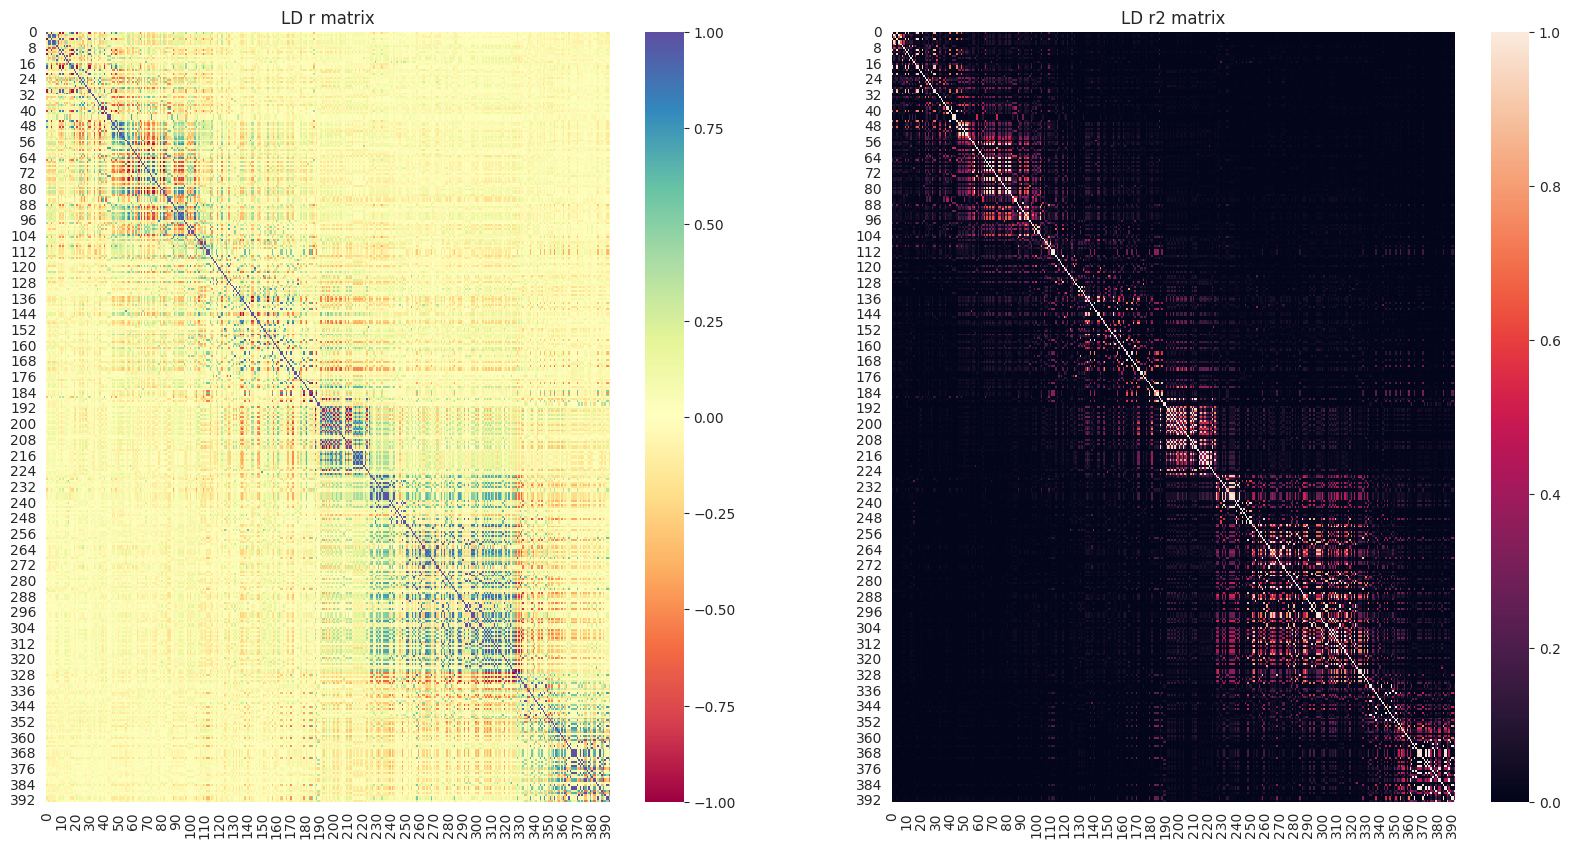

In [37]:
plt.figure(figsize=(10,10),dpi=200)
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
sns.heatmap(data=R_df,cmap="Spectral",ax=ax[0])
sns.heatmap(data=R_df2,ax=ax[1])
ax[0].set_title("LD r matrix")
ax[1].set_title("LD r2 matrix")

In [38]:
ro.r('set.seed(123)')
fit = susieR.susie_rss(
    bhat = df["BETA"].values.reshape(len(R_df), 1),
    shat = df["SE"].values.reshape(len(R_df), 1),
    R = R_df,
    L = 10,
    n = 503
)

In [39]:
print(susieR.susie_get_cs(fit, coverage = 0.95, min_abs_corr = 0.5, Xcorr = R_df))

$cs
$cs$L1
[1] 182 200 203 206


$purity
   min.abs.corr mean.abs.corr median.abs.corr
L1     0.851918     0.9244637       0.9237885

$cs_index
[1] 1

$coverage
[1] 0.999286

$requested_coverage
[1] 0.95


In [40]:
df["cs"] = 0
n_cs = len(susieR.susie_get_cs(fit, coverage = 0.95, min_abs_corr = 0.5, Xcorr = R_df)[0])
credible_sets = susieR.susie_get_cs(fit, coverage=0.95, min_abs_corr=0.5, Xcorr=R_df)[0]
for i in range(n_cs):
    cs_index = credible_sets[i]
    df.loc[np.array(cs_index)-1, "cs"] = i + 1

df["pip"] = np.array(susieR.susie_get_pip(fit))
df

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT,cs,pip
0,2:55074978:G:A,rs2116491,2,55074978,A,G,0.949495,0.533237,0.305248,-1.746900,0.080655,1.704440,495,9960019,G,A,0,1.363243e-12
1,2:55076441:T:C,rs6545449,2,55076441,C,T,0.337702,0.270752,0.133054,2.034920,0.041859,1.310950,496,9960009,T,C,0,2.312150e-12
2,2:55077573:C:G,rs13020090,2,55077573,G,C,0.252525,0.134304,0.145470,0.923250,0.355877,1.143740,495,9960009,C,G,0,4.658496e-13
3,2:55078875:T:G,rs17417648,2,55078875,G,T,0.051411,-0.580426,0.303644,-1.911530,0.055936,0.559660,496,9960009,T,G,0,1.826317e-12
4,2:55079388:C:T,rs13033818,2,55079388,T,C,0.332323,0.220043,0.133361,1.649980,0.098947,1.246130,495,9960009,C,T,0,1.161515e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2:56059103:C:T,rs2195612,2,56059103,T,C,0.807927,-0.133263,0.167707,0.794589,0.426852,0.875235,492,9960019,C,T,0,4.179990e-13
389,2:56060313:A:G,rs59877895,2,56060313,G,A,0.045363,-0.385121,0.315762,-1.219660,0.222595,0.680368,496,9960009,A,G,0,6.358247e-13
390,2:56060585:A:T,rs55780112,2,56060585,T,A,0.020161,0.111738,0.462563,0.241559,0.809122,1.118220,496,9960009,A,T,0,3.154144e-13
391,2:56069486:C:T,rs72807737,2,56069486,T,C,0.021298,0.214587,0.452979,0.473718,0.635701,1.239350,493,9960009,C,T,0,3.422818e-13


### Create regional plot

In [41]:
ld2.shape

(393, 393)

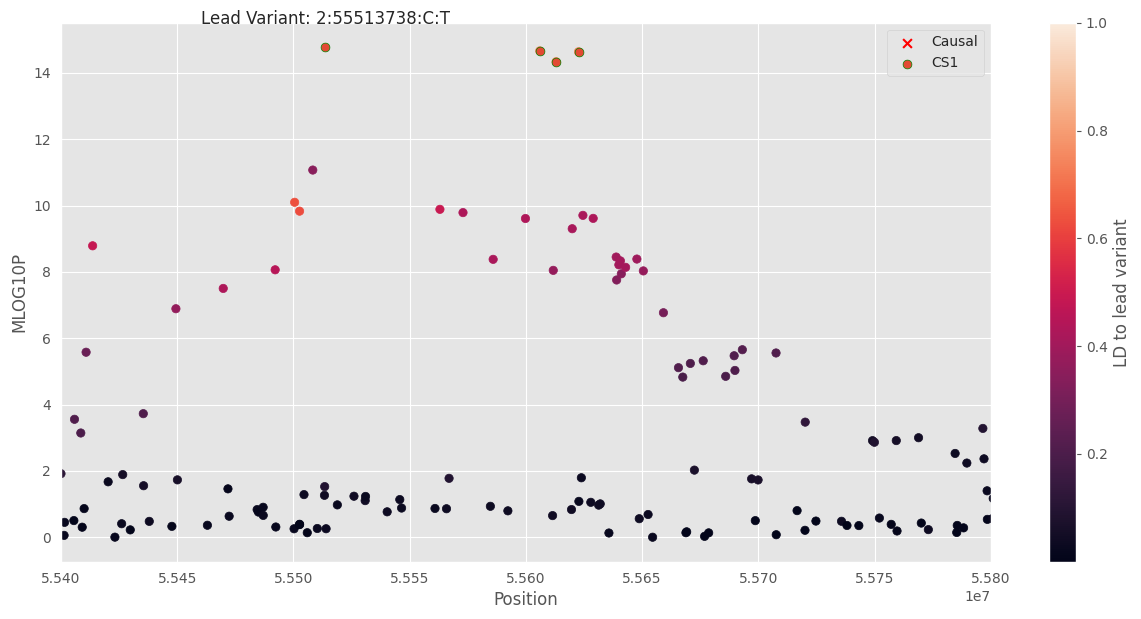

In [42]:
plt.style.use("ggplot")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
col_to_plot = "MLOG10P"
df[col_to_plot] = -np.log10(df["P"])
#plot the variants with their LD score to the lead variant
p=ax.scatter(df["POS"], df[col_to_plot], c=ld2[df["P"].idxmin()])
#show the lead variant
lead_x, lead_y = df.loc[df["P"].idxmin(), "POS"], df.loc[df["P"].idxmin(), col_to_plot]
ax.annotate(f"Lead Variant: {df.loc[df['P'].idxmin(), 'SNPID']}", 
            (lead_x, lead_y), 
            textcoords="offset points", xytext=(0, lead_y + 2), ha='center', fontsize=12)

#plot the causal variant
ax.scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],
           marker='x',s=40,c="red",label="Causal")

#plot circles around variants in credible sets
for i in range(n_cs):
    cs_index = credible_sets[i]
    pos = df.loc[np.array(cs_index)-1, "POS"]
    y = df.loc[np.array(cs_index)-1, col_to_plot]
    ax.scatter(pos, y, marker='o', s=40, label=f"CS{i+1}", edgecolor="green")



plt.colorbar(p, label="LD to lead variant")
ax.set_xlabel("Position")
ax.set_ylabel(col_to_plot)
ax.set_xlim((55400000, 55800000))
plt.legend()
plt.show()

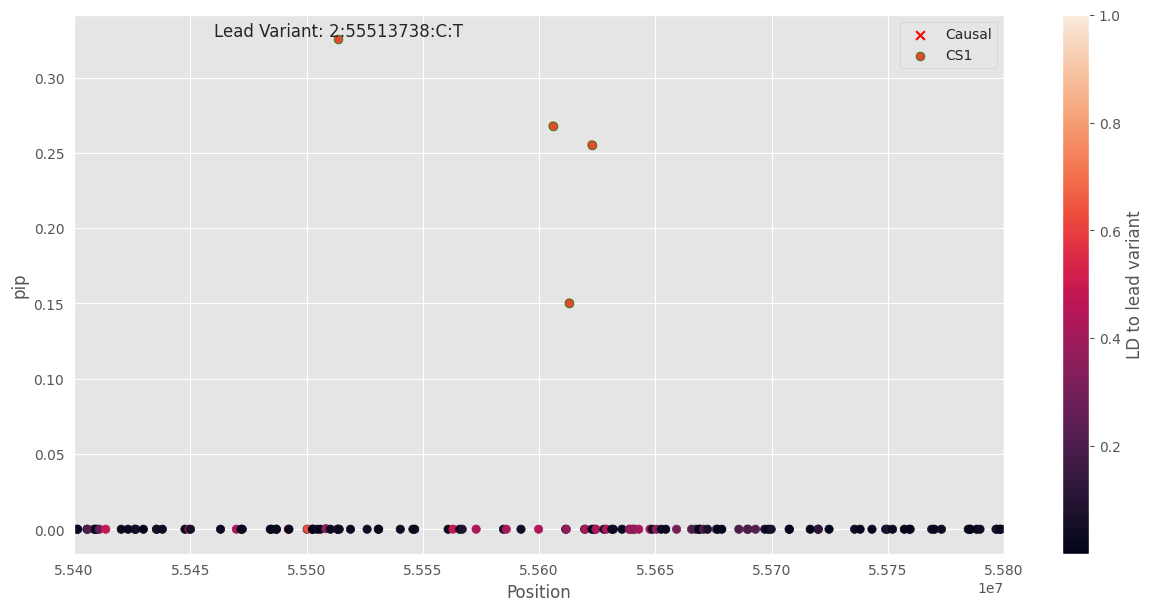

In [43]:
plt.style.use("ggplot")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
col_to_plot = "pip"
p=ax.scatter(df["POS"], df[col_to_plot], c=ld2[df["P"].idxmin()])
#show the lead variant
lead_x, lead_y = df.loc[df["P"].idxmin(), "POS"], df.loc[df["P"].idxmin(), col_to_plot]
ax.annotate(f"Lead Variant: {df.loc[df['P'].idxmin(), 'SNPID']}", 
            (lead_x, lead_y), 
            textcoords="offset points", xytext=(0, lead_y + 2), ha='center', fontsize=12)

#plot the causal variant
ax.scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],
           marker='x',s=40,c="red",label="Causal")

#plot circles around variants in credible sets
for i in range(n_cs):
    cs_index = credible_sets[i]
    pos = df.loc[np.array(cs_index)-1, "POS"]
    y = df.loc[np.array(cs_index)-1, col_to_plot]
    ax.scatter(pos, y, marker='o', s=40, label=f"CS{i+1}", edgecolor="green")



plt.colorbar(p, label="LD to lead variant")
ax.set_xlabel("Position")
ax.set_ylabel(col_to_plot)
ax.set_xlim((55400000, 55800000))
plt.legend()
plt.show()

### Pitfalls

The causal variant we used to simulate is actually 2:55620927:G:A, which was filtered out during data preparation due
 to FIRTH_CONVERGE_FAIL.  So the credible set we identified does not really include the bona fide causal variant.


Lets then check the variants in credible set

In [44]:
cs_index = np.array(credible_sets[0])
for i in range(1, n_cs):
    cs_index = np.concatenate((cs_index, np.array(credible_sets[i])), axis=0)
# cs_index = np.array(cs_index).flatten()
credible_snps_df = df.loc[cs_index - 1, :]
credible_snps_df

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT,cs,pip,MLOG10P
181,2:55513738:C:T,rs6738970,2,55513738,T,C,0.623992,1.219516,0.153159,-7.96244,1.686760e-15,3.385550,496,9960019,C,T,1,0.325435,14.772947
199,2:55605943:A:G,rs7583757,2,55605943,G,A,0.685484,1.321987,0.166688,-7.93089,2.175840e-15,3.750868,496,9960019,A,G,1,0.267953,14.662373
202,2:55612986:G:C,rs13008631,2,55612986,C,G,0.685223,1.302133,0.166154,-7.83691,4.617840e-15,3.677133,494,9960019,G,C,1,0.150449,14.335561
205,2:55622624:G:A,rs1902056,2,55622624,A,G,0.688508,1.324109,0.167119,-7.92315,2.315640e-15,3.758833,496,9960019,G,A,1,0.255449,14.635329


In [45]:
# write the credible set to a file
causal_variant_id = "2:55620927:G:A"
credible_snplist = list(credible_snps_df["SNPID"].values)
credible_snplist.append(causal_variant_id)
with open("./notebooks/credible.snplist", "w") as f:
    f.write("\n".join(credible_snplist))
    #write the causal variant as well
    

In [46]:
# run plink to get the LD matrix for the credible set
!plink \
  --bfile "./notebooks/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r2 square \
  --extract ./notebooks/credible.snplist \
  --out ./notebooks/credible_r

!plink \
  --bfile "./notebooks/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r2 square \
  --extract ./notebooks/credible.snplist \
  --out ./notebooks/credible_r2

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./notebooks/credible_r.log.
Options in effect:
  --bfile ./notebooks/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract ./notebooks/credible.snplist
  --keep-allele-order
  --out ./notebooks/credible_r
  --r2 square

257435 MB RAM detected; reserving 128717 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./notebooks/credible_r.nosex .
--extract: 5 variants remaining.
Using up to 27 threads (change this with --threads).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.995635.
5 variants and 504 people pass filters and QC.
Note: No phenotypes present.
--r2 square to ./notebooks/credible_r.ld ... done.
PLINK v

In [47]:
credible_snplist

['2:55513738:C:T',
 '2:55605943:A:G',
 '2:55612986:G:C',
 '2:55622624:G:A',
 '2:55620927:G:A']

In [48]:
ld = pd.read_csv("./notebooks/credible_r.ld",sep="\t",header=None)
ld.columns=credible_snplist
ld.index=credible_snplist
ld2 = pd.read_csv("./notebooks/credible_r2.ld",sep="\t",header=None)
ld2.columns=credible_snplist
ld2.index=credible_snplist
ld2

,2:55513738:C:T,2:55605943:A:G,2:55612986:G:C,2:55622624:G:A,2:55620927:G:A
2:55513738:C:T,1.000000,0.72653,0.725987,0.727038,0.725764
2:55605943:A:G,0.726530,1.00000,0.990500,1.000000,1.000000
2:55612986:G:C,0.725987,0.99050,1.000000,0.990517,0.990444
2:55622624:G:A,0.727038,1.00000,0.990517,1.000000,1.000000
2:55620927:G:A,0.725764,1.00000,0.990444,1.000000,1.000000


Text(0.5, 1.0, 'LD r2 matrix')

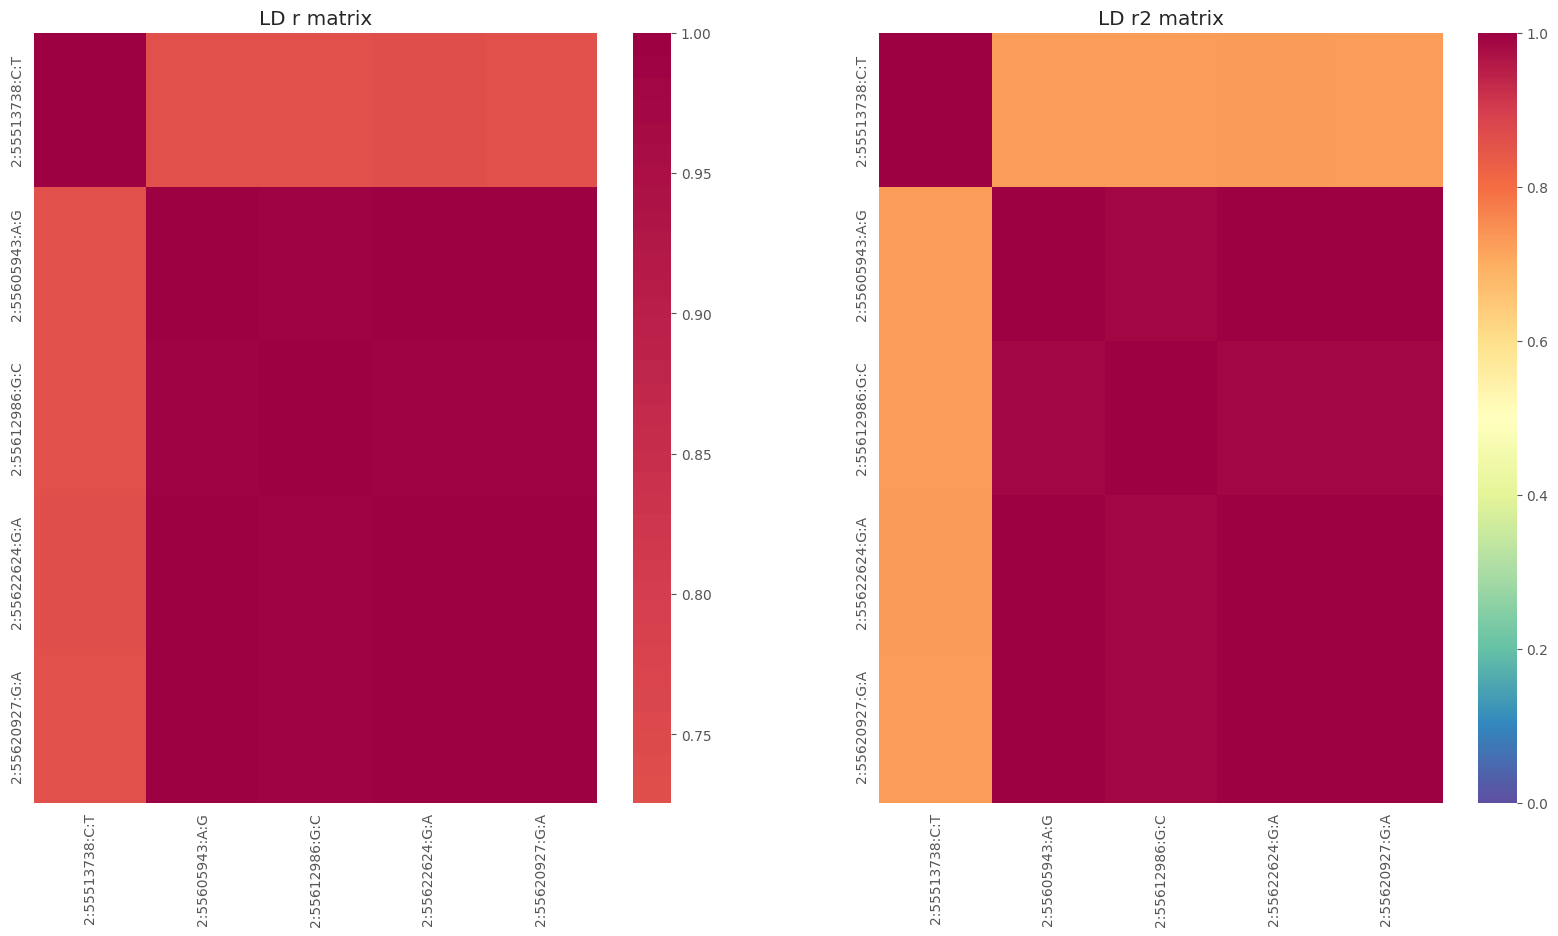

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
sns.heatmap(data=ld, cmap="Spectral_r", ax=ax[0], center=0)
sns.heatmap(data=ld2,cmap="Spectral_r",ax=ax[1],vmin=0,vmax=1)
ax[0].set_title("LD r matrix")
ax[1].set_title("LD r2 matrix")